# Uniform Distribution Test

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from graspologic.models import EdgeSwapper
from graspologic.simulations import er_np
from graspologic.utils import binarize, symmetrize
from os.path import dirname, join
from pathlib import Path
import networkx as nx
from networkx import to_numpy_array, from_numpy_array, attribute_assortativity_coefficient, numeric_assortativity_coefficient

/opt/miniconda3/envs/kullah/lib/python3.7/site-packages/numba/core/cpu.py:97: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'VersionConflict((scipy 1.7.3 (/opt/miniconda3/envs/kullah/lib/python3.7/site-packages), Requirement.parse('scipy<=1.6.2,>=0.16')))'.
  numba.core.entrypoints.init_all()


In [3]:
G = nx.path_graph(5)

visited_graphs = {}
A = nx.to_numpy_array(G)
swapper = EdgeSwapper(A)
for i in range(0, 10000):
    A, edge_list = swapper.swap_edges()
    new_G = nx.from_numpy_array(A)
    try:
        visited_graphs[str(tuple(new_G.edges()))] += 1
    
    except:
        visited_graphs[str(tuple(new_G.edges()))] = 1

<BarContainer object of 7 artists>

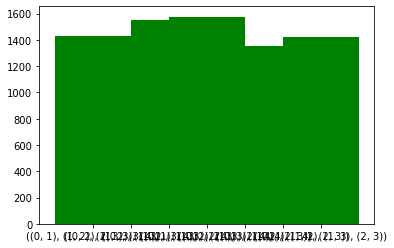

In [4]:
plt.bar(visited_graphs.keys(), visited_graphs.values(), 2.0, color='g')

In [5]:
B = csr_matrix(A)
visited_graphs = {}
swapped = EdgeSwapper(B)
for i in range(0, 10000):
    C, edge_list = swapper.swap_edges()
    new_G = nx.from_numpy_array(C)
    try:
        visited_graphs[str(tuple(new_G.edges()))] += 1
    
    except:
        visited_graphs[str(tuple(new_G.edges()))] = 1

<BarContainer object of 7 artists>

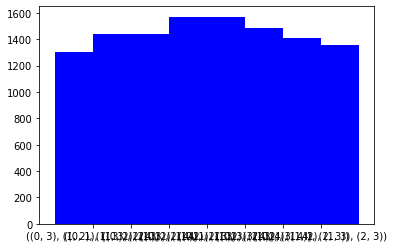

In [6]:
plt.bar(visited_graphs.keys(), visited_graphs.values(), 2.0, color='b')

In [25]:
import networkx as nx
from tqdm import tqdm

A = np.zeros((6, 6))
A[0, 1] = 1
A[0, 2] = 1
A[0, 4] = 1
A[3, 4] = 1
A[2, 3] = 1
A[4, 5] = 1
A = binarize(symmetrize(A))


visited_graphs = {}
swapper = EdgeSwapper(A)
n_samples = 10_000_000
mixing_time = 10_000
# n_samples = 100_000
# mixing_time = 1
for i in tqdm(range(0, n_samples)):
    A, edge_list = swapper.swap_edges()
    if i % mixing_time == 0:
        new_G = nx.from_numpy_array(A)
        key = str(tuple(new_G.edges()))
        if key not in visited_graphs:
            visited_graphs[key] = 0
        visited_graphs[key] += 1


#%%
from scipy.stats import chisquare

counts = np.array(list(visited_graphs.values()))

chisquare(counts)

100%|████████████████████████████| 10000000/10000000 [02:09<00:00, 77478.09it/s]


Power_divergenceResult(statistic=9.63, pvalue=0.8852233090753292)

dict_values([56, 55, 55, 61, 51, 57, 59, 59, 64, 60, 69, 70, 66, 50, 61, 51, 56])
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


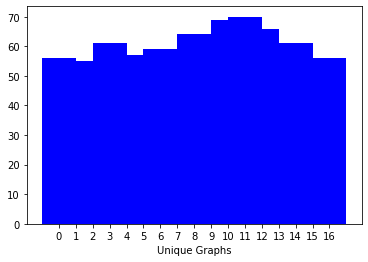

In [30]:
plt.bar(visited_graphs.keys(), visited_graphs.values(), 2.0, color='b')
xlabels = np.arange(len(visited_graphs))
print(visited_graphs.values())
print(xlabels)
plt.xlabel("Unique Graphs")
plt.xticks(ticks=xlabels, labels=xlabels)
plt.ylabel(frequency)
print(xlabels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
dict_values([56, 55, 55, 61, 51, 57, 59, 59, 64, 60, 69, 70, 66, 50, 61, 51, 56])


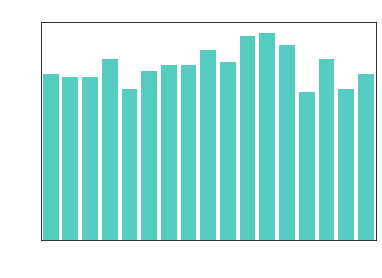

In [52]:
import seaborn as sns
xlabels = np.arange(len(visited_graphs))
print(xlabels)
print(visited_graphs.values())
ax = sns.barplot(x=xlabels, y=counts, color="turquoise")
ax.set_xlabel('Unique Graphs')
ax.set_ylabel('Counts')
ax.set_title('Counts of Unique Graphs of Configuration Model')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color("white")
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


In [22]:
import networkx as nx
from tqdm import tqdm

A = np.zeros((6, 6))
A[0, 1] = 1
A[0, 2] = 1
A[0, 4] = 1
A[3, 4] = 1
A[2, 3] = 1
A[4, 5] = 1
A = binarize(symmetrize(A))


visited_graphs = []
swapper = EdgeSwapper(A)
n_samples = 10_000_000
mixing_time = 10_000
# n_samples = 100_000
# mixing_time = 1
for i in tqdm(range(0, n_samples)):
    A, edge_list = swapper.swap_edges()
    if i % mixing_time == 0:
        new_G = nx.from_numpy_array(A)
        visited_graphs.append(new_G)


#%%
from scipy.stats import chisquare


100%|████████████████████████████| 10000000/10000000 [02:14<00:00, 74296.55it/s]


AttributeError: 'list' object has no attribute 'values'

[<networkx.classes.graph.Graph object at 0x7ff6d07e8f50>, <networkx.classes.graph.Graph object at 0x7ff6d07f2c10>, <networkx.classes.graph.Graph object at 0x7ff6d0574150>, <networkx.classes.graph.Graph object at 0x7ff6d08a50d0>, <networkx.classes.graph.Graph object at 0x7ff6d0773a90>, <networkx.classes.graph.Graph object at 0x7ff6d07e8b90>, <networkx.classes.graph.Graph object at 0x7ff6d07f2e50>, <networkx.classes.graph.Graph object at 0x7ff6d07f2410>, <networkx.classes.graph.Graph object at 0x7ff6d08ab290>, <networkx.classes.graph.Graph object at 0x7ff6d08ab910>, <networkx.classes.graph.Graph object at 0x7ff6d08abd50>, <networkx.classes.graph.Graph object at 0x7ff6d08aba90>, <networkx.classes.graph.Graph object at 0x7ff6d08ab650>, <networkx.classes.graph.Graph object at 0x7ff6d08ab550>, <networkx.classes.graph.Graph object at 0x7ff6d08a5110>, <networkx.classes.graph.Graph object at 0x7ff6d0834b10>, <networkx.classes.graph.Graph object at 0x7ff6d0834150>, <networkx.classes.graph.Graph 

/opt/miniconda3/envs/kullah/lib/python3.7/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp
